In [1]:
%matplotlib inline

import matplotlib.pyplot as plt
import numpy as np
import netCDF4 as nc
import xarray as xr
import glob,os
import cmocean as cm

import logging
logging.captureWarnings(True)
logging.getLogger('py.warnings').setLevel(logging.ERROR)

from dask.distributed import Client
from mpl_toolkits.axes_grid1 import make_axes_locatable

import cftime as cft

import gsw as gsw

In [2]:
client = Client()
client

Connection method: Cluster object,Cluster type: distributed.LocalCluster
Dashboard: /proxy/33179/status,
Dashboard: /proxy/33179/status,Workers: 4
Total threads: 4,Total memory: 100.00 GiB
Status: running,Using processes: True
Comm: tcp://127.0.0.1:34415,Workers: 4
Dashboard: /proxy/33179/status,Total threads: 4
Started: Just now,Total memory: 100.00 GiB
Comm: tcp://127.0.0.1:46335,Total threads: 1
Dashboard: /proxy/44921/status,Memory: 25.00 GiB
Nanny: tcp://127.0.0.1:45197,


In [3]:
def gcdist(lat1, lat2, lon1, lon2):
    # Radius of the Earth in m
    r = 6371000
    # Difference between points (lon/lat)
    dlon = lon2-lon1
    dlat = lat2-lat1
    # Calculate distance in km
    gcdist = r * np.deg2rad(np.sqrt(dlat**2 + (dlon*np.cos(np.deg2rad(np.mean([lat1,lat2]))))**2))

    return gcdist

In [4]:
# /g/data/v45/pas561/RG_Argo
rgargo_1921=xr.open_mfdataset('/g/data/v45/pas561/RG_Argo/*9.nc',engine='netcdf4',combine='nested',concat_dim='TIME',decode_times=False)
rgargo_1921


,Array,Chunk
Bytes,415.78 MiB,11.55 MiB
Shape,"(36, 58, 145, 360)","(1, 58, 145, 360)"
Count,108 Tasks,36 Chunks
Type,float32,numpy.ndarray
,Array,Chunk
Bytes,415.78 MiB,11.55 MiB
Shape,"(36, 58, 145, 360)","(1, 58, 145, 360)"
Count,108 Tasks,36 Chunks
Type,float32,numpy.ndarray


In [5]:
#get dxt and dyt for area averaging
print(rgargo_1921.LONGITUDE.shape,rgargo_1921.LATITUDE.shape) 
dxt=np.zeros(rgargo_1921.LONGITUDE.shape) 
dyt=np.zeros(rgargo_1921.LATITUDE.shape) 

for i in range(1,rgargo_1921.LATITUDE.shape[0]):
    dyt[i]=gcdist(rgargo_1921.LATITUDE[i-1],rgargo_1921.LATITUDE[i],rgargo_1921.LONGITUDE[i],rgargo_1921.LONGITUDE[i])
dyt[0]=dyt[1]
dyt

(360,) (145,)


array([111194.9257832, 111194.9257832, 111194.9257832, 111194.9257832,
       111194.9257832, 111194.9257832, 111194.9257832, 111194.9257832,
       111194.9257832, 111194.9257832, 111194.9257832, 111194.9257832,
       111194.9257832, 111194.9257832, 111194.9257832, 111194.9257832,
       111194.9257832, 111194.9257832, 111194.9257832, 111194.9257832,
       111194.9257832, 111194.9257832, 111194.9257832, 111194.9257832,
       111194.9257832, 111194.9257832, 111194.9257832, 111194.9257832,
       111194.9257832, 111194.9257832, 111194.9257832, 111194.9257832,
       111194.9257832, 111194.9257832, 111194.9257832, 111194.9257832,
       111194.9257832, 111194.9257832, 111194.9257832, 111194.9257832,
       111194.9257832, 111194.9257832, 111194.9257832, 111194.9257832,
       111194.9257832, 111194.9257832, 111194.9257832, 111194.9257832,
       111194.9257832, 111194.9257832, 111194.9257832, 111194.9257832,
       111194.9257832, 111194.9257832, 111194.9257832, 111194.9257832,
      

In [6]:
rg_dyt = xr.DataArray(
    data=dyt,
    dims=["LATITUDE"],
    coords=dict(
        lat=(["LATITUDE"], rgargo_1921.LATITUDE.data),
    ),
    attrs=dict(
        description="RGARGO grid dyt",
        units="m",
    ),
)
rg_dyt

<xarray.DataArray (LATITUDE: 145)>
array([111194.9257832, 111194.9257832, 111194.9257832, 111194.9257832,
       111194.9257832, 111194.9257832, 111194.9257832, 111194.9257832,
       111194.9257832, 111194.9257832, 111194.9257832, 111194.9257832,
       111194.9257832, 111194.9257832, 111194.9257832, 111194.9257832,
       111194.9257832, 111194.9257832, 111194.9257832, 111194.9257832,
       111194.9257832, 111194.9257832, 111194.9257832, 111194.9257832,
       111194.9257832, 111194.9257832, 111194.9257832, 111194.9257832,
       111194.9257832, 111194.9257832, 111194.9257832, 111194.9257832,
       111194.9257832, 111194.9257832, 111194.9257832, 111194.9257832,
       111194.9257832, 111194.9257832, 111194.9257832, 111194.9257832,
       111194.9257832, 111194.9257832, 111194.9257832, 111194.9257832,
       111194.9257832, 111194.9257832, 111194.9257832, 111194.9257832,
       111194.9257832, 111194.9257832, 111194.9257832, 111194.9257832,
       111194.9257832, 111194.9257832, 111194.9257832, 111194.9257832,
       111194.9257832, 111194.9257832, 111194.9257832, 111194.9257832,
       111194.9257832, 111194.9257832, 111194.9257832, 111194.9257832,
       111194.9257832, 111194.9257832, 111194.9257832, 111194.9257832,
       111194.9257832, 111194.9257832, 111194.9257832, 111194.9257832,
       111194.9257832, 111194.9257832, 111194.9257832, 111194.9257832,
       111194.9257832, 111194.9257832, 111194.9257832, 111194.9257832,
       111194.9257832, 111194.9257832, 111194.9257832, 111194.9257832,
       111194.9257832, 111194.9257832, 111194.9257832, 111194.9257832,
       111194.9257832, 111194.9257832, 111194.9257832, 111194.9257832,
       111194.9257832, 111194.9257832, 111194.9257832, 111194.9257832,
       111194.9257832, 111194.9257832, 111194.9257832, 111194.9257832,
       111194.9257832, 111194.9257832, 111194.9257832, 111194.9257832,
       111194.9257832, 111194.9257832, 111194.9257832, 111194.9257832,
       111194.9257832, 111194.9257832, 111194.9257832, 111194.9257832,
       111194.9257832, 111194.9257832, 111194.9257832, 111194.9257832,
       111194.9257832, 111194.9257832, 111194.9257832, 111194.9257832,
       111194.9257832, 111194.9257832, 111194.9257832, 111194.9257832,
       111194.9257832, 111194.9257832, 111194.9257832, 111194.9257832,
       111194.9257832, 111194.9257832, 111194.9257832, 111194.9257832,
       111194.9257832, 111194.9257832, 111194.9257832, 111194.9257832,
       111194.9257832, 111194.9257832, 111194.9257832, 111194.9257832,
       111194.9257832, 111194.9257832, 111194.9257832, 111194.9257832,
       111194.9257832])
Coordinates:
    lat      (LATITUDE) float32 -64.5 -63.5 -62.5 -61.5 ... 76.5 77.5 78.5 79.5
Dimensions without coordinates: LATITUDE
Attributes:
    description:  RGARGO grid dyt
    units:        m

In [10]:
rgargo_1921.ARGO_SALINITY_ANOMALY.TIME

<xarray.DataArray 'TIME' (TIME: 36)>
array([180.5, 181.5, 182.5, 183.5, 184.5, 185.5, 186.5, 187.5, 188.5, 189.5,
       190.5, 191.5, 192.5, 193.5, 194.5, 195.5, 196.5, 197.5, 198.5, 199.5,
       200.5, 201.5, 202.5, 203.5, 204.5, 205.5, 206.5, 207.5, 208.5, 209.5,
       210.5, 211.5, 212.5, 213.5, 214.5, 215.5])
Coordinates:
  * TIME     (TIME) float64 180.5 181.5 182.5 183.5 ... 212.5 213.5 214.5 215.5
Attributes:
    units:        months since 2004-01-01 00:00:00
    time_origin:  01-JAN-2004 00:00:00
    axis:         T

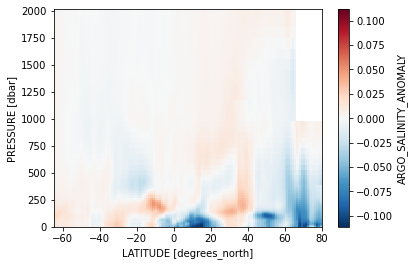

In [11]:
rgargo_1921.ARGO_SALINITY_ANOMALY.mean(dim='LONGITUDE').mean(dim='TIME').plot()

In [13]:
rgargo_0418=xr.open_dataset('/g/data/v45/pas561/RG_Argo/RG_ArgoClim_Salinity_2014_2018.nc',engine='netcdf4',decode_times=False)

In [14]:
rgargo_0418

<xarray.Dataset>
Dimensions:                (LONGITUDE: 360, LATITUDE: 145, PRESSURE: 58, TIME: 180)
Coordinates:
  * LONGITUDE              (LONGITUDE) float32 20.5 21.5 22.5 ... 378.5 379.5
  * LATITUDE               (LATITUDE) float32 -64.5 -63.5 -62.5 ... 78.5 79.5
  * PRESSURE               (PRESSURE) float32 2.5 10.0 ... 1.9e+03 1.975e+03
  * TIME                   (TIME) float32 0.5 1.5 2.5 3.5 ... 177.5 178.5 179.5
Data variables:
    ARGO_SALINITY_MEAN     (PRESSURE, LATITUDE, LONGITUDE) float32 ...
    ARGO_SALINITY_ANOMALY  (TIME, PRESSURE, LATITUDE, LONGITUDE) float32 ...
    BATHYMETRY_MASK        (PRESSURE, LATITUDE, LONGITUDE) float32 ...
    MAPPING_MASK           (PRESSURE, LATITUDE, LONGITUDE) float32 ...

In [15]:
rgargo_0418.ARGO_SALINITY_ANOMALY.TIME

<xarray.DataArray 'TIME' (TIME: 180)>
array([  0.5,   1.5,   2.5,   3.5,   4.5,   5.5,   6.5,   7.5,   8.5,   9.5,
        10.5,  11.5,  12.5,  13.5,  14.5,  15.5,  16.5,  17.5,  18.5,  19.5,
        20.5,  21.5,  22.5,  23.5,  24.5,  25.5,  26.5,  27.5,  28.5,  29.5,
        30.5,  31.5,  32.5,  33.5,  34.5,  35.5,  36.5,  37.5,  38.5,  39.5,
        40.5,  41.5,  42.5,  43.5,  44.5,  45.5,  46.5,  47.5,  48.5,  49.5,
        50.5,  51.5,  52.5,  53.5,  54.5,  55.5,  56.5,  57.5,  58.5,  59.5,
        60.5,  61.5,  62.5,  63.5,  64.5,  65.5,  66.5,  67.5,  68.5,  69.5,
        70.5,  71.5,  72.5,  73.5,  74.5,  75.5,  76.5,  77.5,  78.5,  79.5,
        80.5,  81.5,  82.5,  83.5,  84.5,  85.5,  86.5,  87.5,  88.5,  89.5,
        90.5,  91.5,  92.5,  93.5,  94.5,  95.5,  96.5,  97.5,  98.5,  99.5,
       100.5, 101.5, 102.5, 103.5, 104.5, 105.5, 106.5, 107.5, 108.5, 109.5,
       110.5, 111.5, 112.5, 113.5, 114.5, 115.5, 116.5, 117.5, 118.5, 119.5,
       120.5, 121.5, 122.5, 123.5, 124.5, 125.5, 126.5, 127.5, 128.5, 129.5,
       130.5, 131.5, 132.5, 133.5, 134.5, 135.5, 136.5, 137.5, 138.5, 139.5,
       140.5, 141.5, 142.5, 143.5, 144.5, 145.5, 146.5, 147.5, 148.5, 149.5,
       150.5, 151.5, 152.5, 153.5, 154.5, 155.5, 156.5, 157.5, 158.5, 159.5,
       160.5, 161.5, 162.5, 163.5, 164.5, 165.5, 166.5, 167.5, 168.5, 169.5,
       170.5, 171.5, 172.5, 173.5, 174.5, 175.5, 176.5, 177.5, 178.5, 179.5],
      dtype=float32)
Coordinates:
  * TIME     (TIME) float32 0.5 1.5 2.5 3.5 4.5 ... 176.5 177.5 178.5 179.5
Attributes:
    units:        months since 2004-01-01 00:00:00
    time_origin:  01-JAN-2004 00:00:00
    axis:         T

In [16]:
rgargo_salt_anom_0421=xr.concat((rgargo_0418.ARGO_SALINITY_ANOMALY,rgargo_1921.ARGO_SALINITY_ANOMALY),dim='TIME')

In [17]:
#calculate full monthy data (add anomaly to mean data)
rgargo_salt_0421=(rgargo_salt_anom_0421+rgargo_0418.ARGO_SALINITY_MEAN).compute()

In [18]:
rgargo_salt_0421.shape #18 years of monthly data

(216, 58, 145, 360)

In [19]:
#calc Longterm Monthly Mean

#create xarray of 12 months of data
rgargo_salt_0421_ltmm=rgargo_salt_0421[0:12,:,:,:].copy(deep=True)
print(rgargo_salt_0421_ltmm.shape)

for ii in range(0,12): 
    print(rgargo_salt_0421[ii:216:12,:,:,:].shape)
    tmp=rgargo_salt_0421[ii:216:12,:,:,:].copy(deep=True)
    #print(tmp.TIME)
    rgargo_salt_0421_ltmm[ii,:,:,:]=tmp.mean(dim='TIME').compute()

rgargo_salt_0421_ltmm.to_netcdf('rgargo_salt_0421_ltmm.nc')

(12, 58, 145, 360)
(18, 58, 145, 360)
(18, 58, 145, 360)
(18, 58, 145, 360)
(18, 58, 145, 360)
(18, 58, 145, 360)
(18, 58, 145, 360)
(18, 58, 145, 360)
(18, 58, 145, 360)
(18, 58, 145, 360)
(18, 58, 145, 360)
(18, 58, 145, 360)
(18, 58, 145, 360)


In [20]:
#calc Anomalies relative to Longterm Monthly Mean

#make copy of the xarray to store anoms
rgargo_salt_0421_anom_ltmm=rgargo_salt_0421.copy(deep=True)
#print(rgargo_salt_0421_anom_ltmm)

mnth= 0

for ii in range(0,216): #96
    
    if np.mod(ii,12)==0:
        mnth=0
    #print(mnth,ii)
    
    #calc anom relative to LTMM
    rgargo_salt_0421_anom_ltmm[ii,:,:,:]=rgargo_salt_0421[ii,:,:,:]-rgargo_salt_0421_ltmm[mnth,:,:,:]
    
    mnth=mnth+1

rgargo_salt_0421_anom_ltmm.to_netcdf('rgargo_salt_0421_anom_ltmm.nc')

In [21]:
#calc std of zavg salt ltmm anoms
salt_zavg_std=rgargo_salt_0421_anom_ltmm.mean(dim='LONGITUDE').std(axis=0,keep_attrs=True)
salt_zavg_std.shape

(58, 145)

In [22]:
#divide anomalies by std
salt_zavg_anom_div_std=rgargo_salt_0421_anom_ltmm.mean(dim='LONGITUDE')/rgargo_salt_0421_anom_ltmm.mean(dim='LONGITUDE').std(axis=0,keep_attrs=True)
salt_zavg_anom_div_std.shape

(216, 58, 145)

In [26]:
#make a movie of zonal average salt anoms/std

fig = plt.figure(figsize=(12, 12), dpi=150)
plt.subplot(1, 1, 1)
plt.gca().patch.set_color('.25')

clev = np.arange(-0.03,0.0305,.0005)
tick_lvls = np.arange(-0.03,.031, .01)

#clev2 = np.arange(-3,3.1,.1)
#tick_lvls2 = np.arange(-3,3.1,.1)

yr=2013
mnth= 0 #['Jan,Feb,Mar]
mnth_txt=['Jan','Feb','Mar','Apr','May','Jun','July','Aug','Sept','Oct','Nov','Dec']


for ii in range(0,96): #96
    
    if np.mod(ii,12)==0:
        yr=yr+1
        mnth=0
    print(mnth,ii) #var2a.TIME)
    
    #monthly mean anom zavg
    var1=    rgargo_salt_0421_anom_ltmm.mean(dim='LONGITUDE')[120+ii]
    p1=plt.contourf(var1.LATITUDE,var1.PRESSURE,var1,cmap=cm.cm.balance,levels=clev,extend='both') #
    
    #monthly mean anom zavg/std
    var1=salt_zavg_anom_div_std[120+ii]
    p2=plt.contourf(var1.LATITUDE,var1.PRESSURE,var1.where((var1>2) | (var1<-2)),colors='none',hatches='.') #
    
    plt.gca().invert_yaxis()
    plt.ylabel('Pressure (dbar)')
    plt.xlabel('Latitude ($^\circ$S)')
    #plt.ylim((5500,1000))
    plt.xlim([-64.5,-30])
    #plt.xticks([-65,-55])       
    tit='RG ARGO salt Anomaly (-LTMM)/STD '+ str(yr) +' '+mnth_txt[mnth]
    print(tit)
    plt.title(tit)
    
    divider = make_axes_locatable(plt.gca())
    cax = divider.append_axes("right", "2%", pad="5%")
    cb=plt.colorbar(p1,cax,orientation='vertical',ticks=tick_lvls)
    cb.ax.set_xlabel('$^\circ$C')

    plt.tight_layout()
    
    mnth=mnth+1
    
    filestr = '/home/561/pas561/gdv45/jnb/SeaIce2021/movies/zavg_ltmm_salt_anom_div_std_image%04d.png' % ii
    plt.savefig(filestr,dpi=150,bbox_inches='tight')
    plt.clf()

0 0
RG ARGO salt Anomaly (-LTMM)/STD 2014 Jan
1 1
RG ARGO salt Anomaly (-LTMM)/STD 2014 Feb
2 2
RG ARGO salt Anomaly (-LTMM)/STD 2014 Mar
3 3
RG ARGO salt Anomaly (-LTMM)/STD 2014 Apr
4 4
RG ARGO salt Anomaly (-LTMM)/STD 2014 May
5 5
RG ARGO salt Anomaly (-LTMM)/STD 2014 Jun
6 6
RG ARGO salt Anomaly (-LTMM)/STD 2014 July
7 7
RG ARGO salt Anomaly (-LTMM)/STD 2014 Aug
8 8
RG ARGO salt Anomaly (-LTMM)/STD 2014 Sept
9 9
RG ARGO salt Anomaly (-LTMM)/STD 2014 Oct
10 10
RG ARGO salt Anomaly (-LTMM)/STD 2014 Nov
11 11
RG ARGO salt Anomaly (-LTMM)/STD 2014 Dec
0 12
RG ARGO salt Anomaly (-LTMM)/STD 2015 Jan
1 13
RG ARGO salt Anomaly (-LTMM)/STD 2015 Feb
2 14
RG ARGO salt Anomaly (-LTMM)/STD 2015 Mar
3 15
RG ARGO salt Anomaly (-LTMM)/STD 2015 Apr
4 16
RG ARGO salt Anomaly (-LTMM)/STD 2015 May
5 17
RG ARGO salt Anomaly (-LTMM)/STD 2015 Jun
6 18
RG ARGO salt Anomaly (-LTMM)/STD 2015 July
7 19
RG ARGO salt Anomaly (-LTMM)/STD 2015 Aug
8 20
RG ARGO salt Anomaly (-LTMM)/STD 2015 Sept
9 21
RG ARGO salt

<Figure size 1800x1800 with 0 Axes>

In [32]:
from PIL import Image
import glob
!ffmpeg -framerate 5 -pattern_type glob -i '/home/561/pas561/gdv45/jnb/SeaIce2021/movies/zavg_ltmm_salt_anom_div_std_image*.png' -s 1800x1800 -c:v libx264 -pix_fmt yuv420p /home/561/pas561/gdv45/jnb/SeaIce2021/movies/zavg_ltmm_salt_anom_hatched_1421.mp4

ffmpeg version 4.4.1 Copyright (c) 2000-2021 the FFmpeg developers
  built with gcc 9.4.0 (GCC)
  configuration: --prefix=/home/conda/feedstock_root/build_artifacts/ffmpeg_1636205340875/_h_env_placehold_placehold_placehold_placehold_placehold_placehold_placehold_placehold_placehold_placehold_placehold_placehold_placehold_placehold_placehold_placehold_placehold_placehold_plac --cc=/home/conda/feedstock_root/build_artifacts/ffmpeg_1636205340875/_build_env/bin/x86_64-conda-linux-gnu-cc --disable-doc --disable-openssl --enable-avresample --enable-demuxer=dash --enable-gnutls --enable-gpl --enable-hardcoded-tables --enable-libfreetype --enable-libopenh264 --enable-vaapi --enable-libx264 --enable-libx265 --enable-libaom --enable-libsvtav1 --enable-libxml2 --enable-libvpx --enable-pic --enable-pthreads --enable-shared --disable-static --enable-version3 --enable-zlib --enable-libmp3lame --pkg-config=/home/conda/feedstock_root/build_artifacts/ffmpeg_1636205340875/_build_env/bin/pkg-config
  lib

In [38]:
rgargo_salt_0421_anom_ltmm.shape

(216, 58, 145, 360)

In [39]:
dzt=xr.concat((rgargo_salt_0421_anom_ltmm.PRESSURE[0].diff('PRESSURE'),rgargo_salt_0421_anom_ltmm.PRESSURE.diff('PRESSURE')),dim='PRESSURE')
dzt.sel(PRESSURE=slice(0,100)).sum()

<xarray.DataArray 'PRESSURE' ()>
array(100., dtype=float32)

In [40]:
#upper 100m divide anomalies by std

#not depth weighted averaged
#salt_100m_anom_div_std=rgargo_salt_0421_anom_ltmm[:,0:11,:,:].mean(dim='PRESSURE')/rgargo_salt_0421_anom_ltmm[:,0:11,:,:].mean(dim='PRESSURE').std(axis=0,keep_attrs=True)
#salt_100m_anom_div_std.shape

#depth weighted average
rgargo_salt_0421_anom_ltmm_100m=(rgargo_salt_0421_anom_ltmm*dzt).sel(PRESSURE=slice(0,100)).sum('PRESSURE') / dzt.sel(PRESSURE=slice(0,100)).sum()
rgargo_salt_0421_anom_ltmm_100m=rgargo_salt_0421_anom_ltmm_100m.where(rgargo_salt_0421_anom_ltmm_100m!=0,np.NaN)
rgargo_salt_0421_anom_ltmm_100m

<xarray.DataArray (TIME: 216, LATITUDE: 145, LONGITUDE: 360)>
array([[[ 0.00612412,  0.0061615 ,  0.00602093, ...,  0.00615215,
          0.00562   ,  0.00564232],
        [ 0.00541334,  0.00707312,  0.00668268, ...,  0.00192938,
          0.00151958,  0.00301027],
        [ 0.00466976,  0.00501528,  0.00473299, ...,  0.00227604,
          0.0021492 ,  0.00316505],
        ...,
        [        nan,         nan,         nan, ...,         nan,
                 nan,         nan],
        [        nan,         nan,         nan, ...,         nan,
                 nan,         nan],
        [        nan,         nan,         nan, ...,         nan,
                 nan,         nan]],

       [[ 0.00684662,  0.0079709 ,  0.00922728, ...,  0.00505886,
          0.00588713,  0.00598392],
        [ 0.00394058,  0.00570707,  0.00711098, ...,  0.00402451,
          0.00329781,  0.00282145],
        [ 0.00678463,  0.00819454,  0.00901051, ...,  0.00641813,
          0.0057025 ,  0.00574932],
...
        [        nan,         nan,         nan, ...,         nan,
                 nan,         nan],
        [        nan,         nan,         nan, ...,         nan,
                 nan,         nan],
        [        nan,         nan,         nan, ...,         nan,
                 nan,         nan]],

       [[-0.01334896, -0.01496477, -0.01570559, ..., -0.00946817,
         -0.01140204, -0.012432  ],
        [-0.03408623, -0.03739815, -0.03436804, ..., -0.02091055,
         -0.02332697, -0.02805185],
        [-0.04661999, -0.05151539, -0.04605951, ..., -0.01984158,
         -0.02551947, -0.03564396],
        ...,
        [        nan,         nan,         nan, ...,         nan,
                 nan,         nan],
        [        nan,         nan,         nan, ...,         nan,
                 nan,         nan],
        [        nan,         nan,         nan, ...,         nan,
                 nan,         nan]]], dtype=float32)
Coordinates:
  * LONGITUDE  (LONGITUDE) float32 20.5 21.5 22.5 23.5 ... 377.5 378.5 379.5
  * LATITUDE   (LATITUDE) float32 -64.5 -63.5 -62.5 -61.5 ... 77.5 78.5 79.5
  * TIME       (TIME) float64 0.5 1.5 2.5 3.5 4.5 ... 212.5 213.5 214.5 215.5

In [41]:
#anom/std
salt_100m_anom_div_std=rgargo_salt_0421_anom_ltmm_100m/rgargo_salt_0421_anom_ltmm_100m.std(axis=0,keep_attrs=True)
salt_100m_anom_div_std                                                

<xarray.DataArray (TIME: 216, LATITUDE: 145, LONGITUDE: 360)>
array([[[ 0.32887015,  0.326106  ,  0.31257632, ...,  0.3182365 ,
          0.2928254 ,  0.30253312],
        [ 0.26329485,  0.3337236 ,  0.31165355, ...,  0.09567256,
          0.07582975,  0.15046802],
        [ 0.21239695,  0.21832763,  0.2050703 , ...,  0.10746341,
          0.10247436,  0.1495449 ],
        ...,
        [        nan,         nan,         nan, ...,         nan,
                 nan,         nan],
        [        nan,         nan,         nan, ...,         nan,
                 nan,         nan],
        [        nan,         nan,         nan, ...,         nan,
                 nan,         nan]],

       [[ 0.36766922,  0.4218714 ,  0.47903383, ...,  0.26168305,
          0.30674368,  0.32084957],
        [ 0.19166258,  0.269271  ,  0.33162755, ...,  0.19956414,
          0.16456588,  0.1410295 ],
        [ 0.30858847,  0.35672897,  0.39040586, ...,  0.30303276,
          0.27189624,  0.27164832],
...
        [        nan,         nan,         nan, ...,         nan,
                 nan,         nan],
        [        nan,         nan,         nan, ...,         nan,
                 nan,         nan],
        [        nan,         nan,         nan, ...,         nan,
                 nan,         nan]],

       [[-0.71685046, -0.79203165, -0.8153551 , ..., -0.48976648,
         -0.5940932 , -0.6665864 ],
        [-1.6578906 , -1.7645185 , -1.602788  , ..., -1.0368965 ,
         -1.1640537 , -1.4021674 ],
        [-2.1204386 , -2.2425942 , -1.9956597 , ..., -0.93682194,
         -1.2167739 , -1.6841329 ],
        ...,
        [        nan,         nan,         nan, ...,         nan,
                 nan,         nan],
        [        nan,         nan,         nan, ...,         nan,
                 nan,         nan],
        [        nan,         nan,         nan, ...,         nan,
                 nan,         nan]]], dtype=float32)
Coordinates:
  * LONGITUDE  (LONGITUDE) float32 20.5 21.5 22.5 23.5 ... 377.5 378.5 379.5
  * LATITUDE   (LATITUDE) float32 -64.5 -63.5 -62.5 -61.5 ... 77.5 78.5 79.5
  * TIME       (TIME) float64 0.5 1.5 2.5 3.5 4.5 ... 212.5 213.5 214.5 215.5

In [47]:
#make a movie of upper 100m salt anoms relative to LTMM
fig = plt.figure(figsize=(10, 8), dpi=220)
plt.subplot(1, 1, 1)
plt.gca().patch.set_color('.25')

clev = np.arange(-0.2,0.2005,.0005)
tick_lvls = np.arange(-0.2,.21, .01)

yr=2013
mnth= 0 #['Jan,Feb,Mar]
mnth_txt=['Jan','Feb','Mar','Apr','May','Jun','July','Aug','Sept','Oct','Nov','Dec']


for ii in range(0,96): #96
    
    if np.mod(ii,12)==0:
        yr=yr+1
        mnth=0
    print(mnth,ii) #var2a.TIME)
     
    var1= rgargo_salt_0421_anom_ltmm_100m[120+ii,:,:]
    p1=plt.contourf(var1.LONGITUDE,var1.LATITUDE,var1,cmap=cm.cm.balance,levels=clev,extend='both') #
    
    #monthly mean anom zavg/std
    var1=salt_100m_anom_div_std[120+ii,:,:]
    p2=plt.contourf(var1.LONGITUDE,var1.LATITUDE,var1.where((var1>2) | (var1<-2)),colors='none',hatches='.') #

    plt.gca().patch.set_color('.25')
    plt.xlabel('Longitude ($^\circ$)')
    plt.ylim([-64.5,-30])
    
    tit='RG ARGO salt (0-100m) Anomaly (-LTMM) '+ str(yr) +' '+mnth_txt[mnth]
    print(tit)
    plt.title(tit)
    
    divider = make_axes_locatable(plt.gca())
    cax = divider.append_axes("right", "2%", pad="5%")
    cb=plt.colorbar(p1,cax,orientation='vertical',ticks=tick_lvls)
    cb.ax.set_xlabel('$^\circ$C')

    plt.tight_layout()
    
    mnth=mnth+1
    
    filestr = '/home/561/pas561/gdv45/jnb/SeaIce2021/movies/up100m_ltmm_salt_image%04d.png' % ii
    plt.savefig(filestr,dpi=150,bbox_inches='tight')
    plt.clf()

0 0
RG ARGO salt (0-100m) Anomaly (-LTMM) 2014 Jan
1 1
RG ARGO salt (0-100m) Anomaly (-LTMM) 2014 Feb
2 2
RG ARGO salt (0-100m) Anomaly (-LTMM) 2014 Mar
3 3
RG ARGO salt (0-100m) Anomaly (-LTMM) 2014 Apr
4 4
RG ARGO salt (0-100m) Anomaly (-LTMM) 2014 May
5 5
RG ARGO salt (0-100m) Anomaly (-LTMM) 2014 Jun
6 6
RG ARGO salt (0-100m) Anomaly (-LTMM) 2014 July
7 7
RG ARGO salt (0-100m) Anomaly (-LTMM) 2014 Aug
8 8
RG ARGO salt (0-100m) Anomaly (-LTMM) 2014 Sept
9 9
RG ARGO salt (0-100m) Anomaly (-LTMM) 2014 Oct
10 10
RG ARGO salt (0-100m) Anomaly (-LTMM) 2014 Nov
11 11
RG ARGO salt (0-100m) Anomaly (-LTMM) 2014 Dec
0 12
RG ARGO salt (0-100m) Anomaly (-LTMM) 2015 Jan
1 13
RG ARGO salt (0-100m) Anomaly (-LTMM) 2015 Feb
2 14
RG ARGO salt (0-100m) Anomaly (-LTMM) 2015 Mar
3 15
RG ARGO salt (0-100m) Anomaly (-LTMM) 2015 Apr
4 16
RG ARGO salt (0-100m) Anomaly (-LTMM) 2015 May
5 17
RG ARGO salt (0-100m) Anomaly (-LTMM) 2015 Jun
6 18
RG ARGO salt (0-100m) Anomaly (-LTMM) 2015 July
7 19
RG ARGO salt

<Figure size 2200x1760 with 0 Axes>

In [48]:
from PIL import Image
import glob
!ffmpeg -framerate 5 -pattern_type glob -i '/home/561/pas561/gdv45/jnb/SeaIce2021/movies/up100m_ltmm_salt_image*.png' -s 1800x1800 -c:v libx264 -pix_fmt yuv420p /home/561/pas561/gdv45/jnb/SeaIce2021/movies/up100m_ltmm_salt_anom_hatched_v2_1421.mp4

ffmpeg version 4.4.1 Copyright (c) 2000-2021 the FFmpeg developers
  built with gcc 9.4.0 (GCC)
  configuration: --prefix=/home/conda/feedstock_root/build_artifacts/ffmpeg_1636205340875/_h_env_placehold_placehold_placehold_placehold_placehold_placehold_placehold_placehold_placehold_placehold_placehold_placehold_placehold_placehold_placehold_placehold_placehold_placehold_plac --cc=/home/conda/feedstock_root/build_artifacts/ffmpeg_1636205340875/_build_env/bin/x86_64-conda-linux-gnu-cc --disable-doc --disable-openssl --enable-avresample --enable-demuxer=dash --enable-gnutls --enable-gpl --enable-hardcoded-tables --enable-libfreetype --enable-libopenh264 --enable-vaapi --enable-libx264 --enable-libx265 --enable-libaom --enable-libsvtav1 --enable-libxml2 --enable-libvpx --enable-pic --enable-pthreads --enable-shared --disable-static --enable-version3 --enable-zlib --enable-libmp3lame --pkg-config=/home/conda/feedstock_root/build_artifacts/ffmpeg_1636205340875/_build_env/bin/pkg-config
  lib

In [49]:
rg_dyt.sel(LATITUDE=slice(-65,-55))

<xarray.DataArray (LATITUDE: 10)>
array([111194.9257832, 111194.9257832, 111194.9257832, 111194.9257832,
       111194.9257832, 111194.9257832, 111194.9257832, 111194.9257832,
       111194.9257832, 111194.9257832])
Coordinates:
    lat      (LATITUDE) float32 15.5 16.5 17.5 18.5 19.5 ... 21.5 22.5 23.5 24.5
Dimensions without coordinates: LATITUDE
Attributes:
    description:  RGARGO grid dyt
    units:        m

In [50]:
#average south of 55S for hovmoller
#upper 100m divide anomalies by std

#lat weighted average
rgargo_salt_0421_anom_ltmm_100m_s55S=(rgargo_salt_0421_anom_ltmm_100m*rg_dyt).sel(LATITUDE=slice(-65,-55)).sum('LATITUDE') / rg_dyt.sel(LATITUDE=slice(-65,-55)).sum()
rgargo_salt_0421_anom_ltmm_100m_s55S=rgargo_salt_0421_anom_ltmm_100m_s55S.where(rgargo_salt_0421_anom_ltmm_100m_s55S!=0,np.NaN)
rgargo_salt_0421_anom_ltmm_100m_s55S

<xarray.DataArray (TIME: 216, LONGITUDE: 360)>
array([[-0.0059758 , -0.00274804, -0.00226108, ..., -0.01123043,
        -0.0134351 , -0.0108132 ],
       [-0.00277667, -0.00104392,  0.0010813 , ...,  0.00398836,
         0.00074592, -0.00225554],
       [-0.01302285, -0.01043472, -0.00742551, ..., -0.00698649,
        -0.01080363, -0.01344069],
       ...,
       [ 0.0415345 ,  0.04225546,  0.04253415, ...,  0.04106655,
         0.04039952,  0.04078095],
       [ 0.02748387,  0.02743382,  0.02749654, ...,  0.02795758,
         0.02794345,  0.02776576],
       [-0.00236079, -0.00390576, -0.00221109, ...,  0.00163186,
         0.00141253,  0.00028138]])
Coordinates:
  * LONGITUDE  (LONGITUDE) float32 20.5 21.5 22.5 23.5 ... 377.5 378.5 379.5
  * TIME       (TIME) float64 0.5 1.5 2.5 3.5 4.5 ... 212.5 213.5 214.5 215.5

In [51]:
#anom/std
rgargo_salt_0421_anom_ltmm_100m_s55S_div_std=rgargo_salt_0421_anom_ltmm_100m_s55S/rgargo_salt_0421_anom_ltmm_100m_s55S.std(axis=0,keep_attrs=True)
rgargo_salt_0421_anom_ltmm_100m_s55S_div_std                                                

<xarray.DataArray (TIME: 216, LONGITUDE: 360)>
array([[-0.2508187 , -0.1175779 , -0.09728744, ..., -0.43978051,
        -0.53255081, -0.44161929],
       [-0.11654354, -0.04466526,  0.04652535, ...,  0.15618311,
         0.02956721, -0.09211778],
       [-0.54660043, -0.44646085, -0.31949777, ..., -0.27358915,
        -0.4282428 , -0.54892827],
       ...,
       [ 1.74330294,  1.80794526,  1.83011929, ...,  1.60815463,
         1.6013877 ,  1.66552542],
       [ 1.15356433,  1.17378571,  1.18309507, ...,  1.09481111,
         1.10764416,  1.13397491],
       [-0.09908814, -0.16711231, -0.09513685, ...,  0.06390321,
         0.05599077,  0.01149184]])
Coordinates:
  * LONGITUDE  (LONGITUDE) float32 20.5 21.5 22.5 23.5 ... 377.5 378.5 379.5
  * TIME       (TIME) float64 0.5 1.5 2.5 3.5 4.5 ... 212.5 213.5 214.5 215.5

In [52]:
rgargo_salt_0421_anom_ltmm_100m_s55S[120:,:].data.transpose().shape

(360, 96)

In [53]:
rgargo_salt_0421_anom_ltmm_100m_s55S[120:].TIME

<xarray.DataArray 'TIME' (TIME: 96)>
array([120.5, 121.5, 122.5, 123.5, 124.5, 125.5, 126.5, 127.5, 128.5, 129.5,
       130.5, 131.5, 132.5, 133.5, 134.5, 135.5, 136.5, 137.5, 138.5, 139.5,
       140.5, 141.5, 142.5, 143.5, 144.5, 145.5, 146.5, 147.5, 148.5, 149.5,
       150.5, 151.5, 152.5, 153.5, 154.5, 155.5, 156.5, 157.5, 158.5, 159.5,
       160.5, 161.5, 162.5, 163.5, 164.5, 165.5, 166.5, 167.5, 168.5, 169.5,
       170.5, 171.5, 172.5, 173.5, 174.5, 175.5, 176.5, 177.5, 178.5, 179.5,
       180.5, 181.5, 182.5, 183.5, 184.5, 185.5, 186.5, 187.5, 188.5, 189.5,
       190.5, 191.5, 192.5, 193.5, 194.5, 195.5, 196.5, 197.5, 198.5, 199.5,
       200.5, 201.5, 202.5, 203.5, 204.5, 205.5, 206.5, 207.5, 208.5, 209.5,
       210.5, 211.5, 212.5, 213.5, 214.5, 215.5])
Coordinates:
  * TIME     (TIME) float64 120.5 121.5 122.5 123.5 ... 212.5 213.5 214.5 215.5
Attributes:
    units:        months since 2004-01-01 00:00:00
    time_origin:  01-JAN-2004 00:00:00
    axis:         T

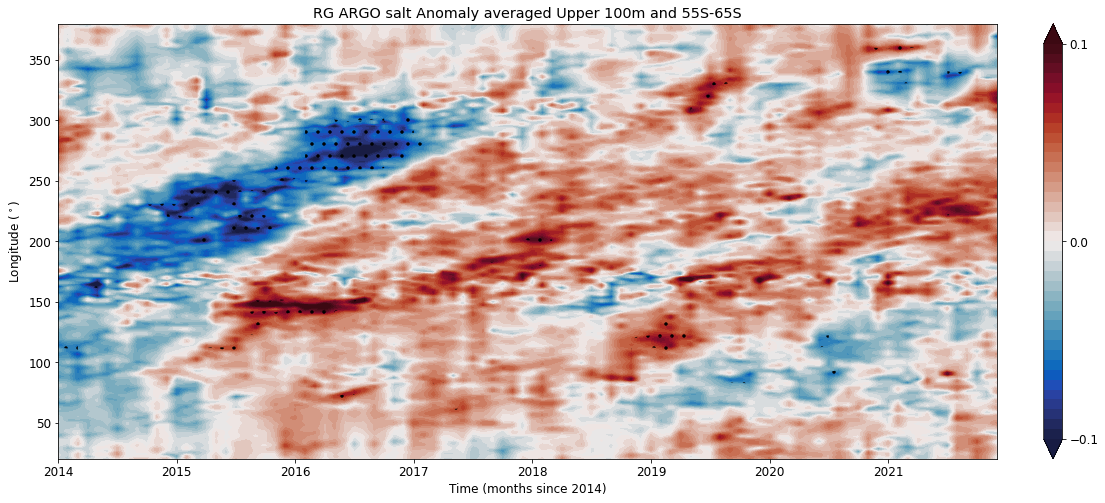

In [55]:
#plot hovmoller
fontsize=12
plt.rcParams['font.size'] = fontsize

plt.figure(figsize=(18,8))

clev = np.arange(-0.1,0.105,.005)
tick_lvls = np.arange(-0.10,.11, .1)

var1= rgargo_salt_0421_anom_ltmm_100m_s55S[120:,:]
p1=plt.contourf(var1.TIME,var1.LONGITUDE,var1.data.transpose(),cmap=cm.cm.balance,levels=clev,extend='both') #
    
#monthly mean anom zavg/std
var1=rgargo_salt_0421_anom_ltmm_100m_s55S_div_std[120:,:]
p2=plt.contourf(var1.TIME,var1.LONGITUDE,var1.where((var1>2) | (var1<-2)).data.transpose(),colors='none',hatches='.') #

plt.gca().patch.set_color('.25')
plt.ylabel('Longitude ($^\circ$)')
plt.xlabel('Time (months since 2014)')
plt.title('RG ARGO salt Anomaly averaged Upper 100m and 55S-65S')
plt.xticks([120.5,120.5+12,120.5+24,120.5+36,120.5+48,120.5+60,120.5+72,120.5+84])
plt.gca().set_xticklabels(['2014','2015','2016','2017','2018','2019','2020','2021'])


divider = make_axes_locatable(plt.gca())
cax = divider.append_axes("right", "2%", pad="5%")
cb=plt.colorbar(p1,cax,orientation='vertical',ticks=tick_lvls)
cb.ax.set_xlabel('$^\circ$C')

plt.savefig('rgargo_salt_0421_anom_ltmm_100m_s55S_hov.png',dpi=150,bbox_inches='tight')


In [56]:
#100 to 500m
#depth weighted average
rgargo_salt_0421_anom_ltmm_500m=(rgargo_salt_0421_anom_ltmm*dzt).sel(PRESSURE=slice(100,500)).sum('PRESSURE') / dzt.sel(PRESSURE=slice(100,500)).sum()
rgargo_salt_0421_anom_ltmm_500m=rgargo_salt_0421_anom_ltmm_500m.where(rgargo_salt_0421_anom_ltmm_500m!=0,np.NaN)
rgargo_salt_0421_anom_ltmm_500m

<xarray.DataArray (TIME: 216, LATITUDE: 145, LONGITUDE: 360)>
array([[[ 0.00847277,  0.00828692,  0.00831941, ...,  0.01421212,
          0.01140046,  0.00935873],
        [ 0.01080462,  0.01077833,  0.01055831, ...,  0.01330222,
          0.01176271,  0.01092555],
        [ 0.01364836,  0.01324672,  0.01228495, ...,  0.01294408,
          0.01309246,  0.01348174],
        ...,
        [        nan,         nan,         nan, ...,         nan,
                 nan,         nan],
        [        nan,         nan,         nan, ...,         nan,
                 nan,         nan],
        [        nan,         nan,         nan, ...,         nan,
                 nan,         nan]],

       [[ 0.00566617,  0.00565333,  0.00562405, ...,  0.00644072,
          0.00608777,  0.00589624],
        [ 0.00535863,  0.00529464,  0.00542641, ...,  0.00642779,
          0.00605795,  0.00544532],
        [ 0.00682587,  0.00685271,  0.0067428 , ...,  0.00740865,
          0.00689334,  0.00676746],
...
        [        nan,         nan,         nan, ...,         nan,
                 nan,         nan],
        [        nan,         nan,         nan, ...,         nan,
                 nan,         nan],
        [        nan,         nan,         nan, ...,         nan,
                 nan,         nan]],

       [[ 0.01135784,  0.01141564,  0.01198122, ...,  0.01343848,
          0.01268231,  0.01190479],
        [ 0.00299784,  0.00198688,  0.00385052, ...,  0.0110088 ,
          0.00898378,  0.00584195],
        [-0.00236293, -0.00447348, -0.00202891, ...,  0.01027065,
          0.00722108,  0.00238809],
        ...,
        [        nan,         nan,         nan, ...,         nan,
                 nan,         nan],
        [        nan,         nan,         nan, ...,         nan,
                 nan,         nan],
        [        nan,         nan,         nan, ...,         nan,
                 nan,         nan]]], dtype=float32)
Coordinates:
  * LONGITUDE  (LONGITUDE) float32 20.5 21.5 22.5 23.5 ... 377.5 378.5 379.5
  * LATITUDE   (LATITUDE) float32 -64.5 -63.5 -62.5 -61.5 ... 77.5 78.5 79.5
  * TIME       (TIME) float64 0.5 1.5 2.5 3.5 4.5 ... 212.5 213.5 214.5 215.5

In [57]:
#average south of 55S for hovmoller
#lat weighted average
rgargo_salt_0421_anom_ltmm_500m_s55S=(rgargo_salt_0421_anom_ltmm_500m*rg_dyt).sel(LATITUDE=slice(-65,-55)).sum('LATITUDE') / rg_dyt.sel(LATITUDE=slice(-65,-55)).sum()
rgargo_salt_0421_anom_ltmm_500m_s55S=rgargo_salt_0421_anom_ltmm_500m_s55S.where(rgargo_salt_0421_anom_ltmm_500m_s55S!=0,np.NaN)
rgargo_salt_0421_anom_ltmm_500m_s55S

<xarray.DataArray (TIME: 216, LONGITUDE: 360)>
array([[0.01658842, 0.01552955, 0.0145751 , ..., 0.01687845, 0.01720287,
        0.01719653],
       [0.0096313 , 0.00774951, 0.00665043, ..., 0.01409881, 0.01452454,
        0.01239734],
       [0.01163227, 0.01106327, 0.01023999, ..., 0.00983929, 0.0106725 ,
        0.01140507],
       ...,
       [0.01514676, 0.01518808, 0.01517834, ..., 0.0141424 , 0.01439838,
        0.01482411],
       [0.00696882, 0.00709763, 0.00716119, ..., 0.00545713, 0.00599796,
        0.00655186],
       [0.00664534, 0.00575482, 0.00606522, ..., 0.0116358 , 0.01018254,
        0.00833745]])
Coordinates:
  * LONGITUDE  (LONGITUDE) float32 20.5 21.5 22.5 23.5 ... 377.5 378.5 379.5
  * TIME       (TIME) float64 0.5 1.5 2.5 3.5 4.5 ... 212.5 213.5 214.5 215.5

In [58]:
#anom/std
rgargo_salt_0421_anom_ltmm_500m_s55S_div_std=rgargo_salt_0421_anom_ltmm_500m_s55S/rgargo_salt_0421_anom_ltmm_500m_s55S.std(axis=0,keep_attrs=True)
rgargo_salt_0421_anom_ltmm_500m_s55S_div_std                                                

<xarray.DataArray (TIME: 216, LONGITUDE: 360)>
array([[1.92646077, 1.76569086, 1.62206106, ..., 2.00222887, 2.035959  ,
        2.03003833],
       [1.11851088, 0.88110986, 0.74012559, ..., 1.67249065, 1.71897808,
        1.46349733],
       [1.35088869, 1.25788002, 1.13960673, ..., 1.16719859, 1.26308999,
        1.34636022],
       ...,
       [1.75903765, 1.72686599, 1.68919514, ..., 1.67766124, 1.7040471 ,
        1.74997657],
       [0.80930944, 0.80699183, 0.79696799, ..., 0.64735989, 0.70985852,
        0.77344247],
       [0.77174284, 0.65431565, 0.67499771, ..., 1.38031209, 1.20510288,
        0.98423072]])
Coordinates:
  * LONGITUDE  (LONGITUDE) float32 20.5 21.5 22.5 23.5 ... 377.5 378.5 379.5
  * TIME       (TIME) float64 0.5 1.5 2.5 3.5 4.5 ... 212.5 213.5 214.5 215.5

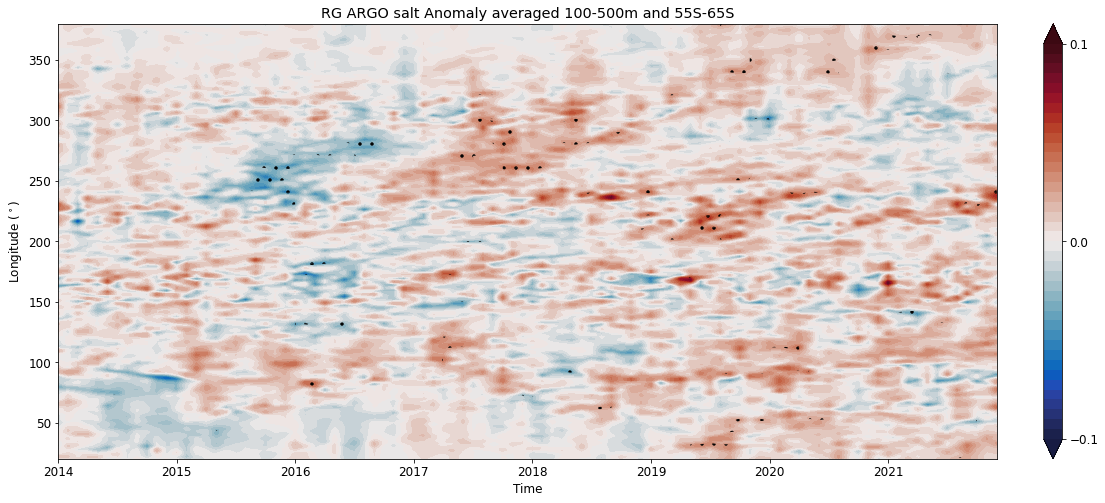

In [60]:
#plot hovmoller
fontsize=12
plt.rcParams['font.size'] = fontsize

plt.figure(figsize=(18,8))

clev = np.arange(-0.1,0.105,.005)
tick_lvls = np.arange(-0.10,.11, .1)

var1= rgargo_salt_0421_anom_ltmm_500m_s55S[120:,:]
p1=plt.contourf(var1.TIME,var1.LONGITUDE,var1.data.transpose(),cmap=cm.cm.balance,levels=clev,extend='both') #
    
#monthly mean anom zavg/std
var1=rgargo_salt_0421_anom_ltmm_500m_s55S_div_std[120:,:]
p2=plt.contourf(var1.TIME,var1.LONGITUDE,var1.where((var1>2) | (var1<-2)).data.transpose(),colors='none',hatches='.') #

plt.gca().patch.set_color('.25')
plt.ylabel('Longitude ($^\circ$)')
plt.xlabel('Time')
plt.title('RG ARGO salt Anomaly averaged 100-500m and 55S-65S')
plt.xticks([120.5,120.5+12,120.5+24,120.5+36,120.5+48,120.5+60,120.5+72,120.5+84])
plt.gca().set_xticklabels(['2014','2015','2016','2017','2018','2019','2020','2021'])


divider = make_axes_locatable(plt.gca())
cax = divider.append_axes("right", "2%", pad="5%")
cb=plt.colorbar(p1,cax,orientation='vertical',ticks=tick_lvls)
cb.ax.set_xlabel('$^\circ$C')

plt.savefig('rgargo_salt_0421_anom_ltmm_500m_s55S_hov.png',dpi=150,bbox_inches='tight')


In [61]:
#500 to 2000m
#depth weighted average
rgargo_salt_0421_anom_ltmm_2000m=(rgargo_salt_0421_anom_ltmm*dzt).sel(PRESSURE=slice(500,2000)).sum('PRESSURE') / dzt.sel(PRESSURE=slice(500,2000)).sum()
rgargo_salt_0421_anom_ltmm_2000m=rgargo_salt_0421_anom_ltmm_2000m.where(rgargo_salt_0421_anom_ltmm_2000m!=0,np.NaN)
rgargo_salt_0421_anom_ltmm_2000m

<xarray.DataArray (TIME: 216, LATITUDE: 145, LONGITUDE: 360)>
array([[[ 0.00056193,  0.00069967,  0.00068892, ...,  0.00036631,
          0.00043573,  0.00055127],
        [ 0.00096622,  0.00103738,  0.00091464, ...,  0.00072993,
          0.00083744,  0.00089444],
        [ 0.0012545 ,  0.00119419,  0.00126418, ...,  0.00121635,
          0.00127304,  0.00123398],
        ...,
        [        nan,         nan,         nan, ...,         nan,
                 nan,         nan],
        [        nan,         nan,         nan, ...,         nan,
                 nan,         nan],
        [        nan,         nan,         nan, ...,         nan,
                 nan,         nan]],

       [[-0.00055155, -0.00061543, -0.00055395, ..., -0.00043134,
         -0.00060023, -0.0005269 ],
        [-0.00051158, -0.00059017, -0.00048674, ..., -0.00052328,
         -0.00054607, -0.00049985],
        [-0.00053147, -0.00052775, -0.00052359, ..., -0.00049913,
         -0.00051224, -0.00051249],
...
        [        nan,         nan,         nan, ...,         nan,
                 nan,         nan],
        [        nan,         nan,         nan, ...,         nan,
                 nan,         nan],
        [        nan,         nan,         nan, ...,         nan,
                 nan,         nan]],

       [[ 0.00197116,  0.00199515,  0.00209547, ...,  0.00211558,
          0.00203648,  0.00203513],
        [ 0.00138515,  0.00131944,  0.001404  , ...,  0.00223793,
          0.00209143,  0.00161097],
        [ 0.00100853,  0.00077855,  0.00097735, ...,  0.00229295,
          0.00195404,  0.00148622],
        ...,
        [        nan,         nan,         nan, ...,         nan,
                 nan,         nan],
        [        nan,         nan,         nan, ...,         nan,
                 nan,         nan],
        [        nan,         nan,         nan, ...,         nan,
                 nan,         nan]]], dtype=float32)
Coordinates:
  * LONGITUDE  (LONGITUDE) float32 20.5 21.5 22.5 23.5 ... 377.5 378.5 379.5
  * LATITUDE   (LATITUDE) float32 -64.5 -63.5 -62.5 -61.5 ... 77.5 78.5 79.5
  * TIME       (TIME) float64 0.5 1.5 2.5 3.5 4.5 ... 212.5 213.5 214.5 215.5

In [62]:
#average south of 55S for hovmoller
#lat weighted average
rgargo_salt_0421_anom_ltmm_2000m_s55S=(rgargo_salt_0421_anom_ltmm_2000m*rg_dyt).sel(LATITUDE=slice(-65,-55)).sum('LATITUDE') / rg_dyt.sel(LATITUDE=slice(-65,-55)).sum()
rgargo_salt_0421_anom_ltmm_2000m_s55S=rgargo_salt_0421_anom_ltmm_2000m_s55S.where(rgargo_salt_0421_anom_ltmm_2000m_s55S!=0,np.NaN)
rgargo_salt_0421_anom_ltmm_2000m_s55S

<xarray.DataArray (TIME: 216, LONGITUDE: 360)>
array([[ 2.47328897e-03,  2.13627463e-03,  1.82791465e-03, ...,
         2.10488371e-03,  2.52085282e-03,  2.63354405e-03],
       [-3.15011959e-05, -3.11953959e-04, -3.92894901e-04, ...,
         5.09416571e-04,  6.09714777e-04,  3.33861684e-04],
       [ 9.38752873e-04,  1.01430909e-03,  1.22257578e-03, ...,
         7.72441515e-04,  8.84177464e-04,  9.14140177e-04],
       ...,
       [ 1.51548465e-03,  1.70750577e-03,  1.92731430e-03, ...,
         9.61111396e-04,  1.06213781e-03,  1.28507063e-03],
       [ 1.46581161e-03,  1.69776413e-03,  1.97112658e-03, ...,
         1.16445053e-03,  1.22109720e-03,  1.33902180e-03],
       [ 2.66805284e-03,  2.27804579e-03,  2.04807624e-03, ...,
         3.06688102e-03,  3.04078662e-03,  2.96179081e-03]])
Coordinates:
  * LONGITUDE  (LONGITUDE) float32 20.5 21.5 22.5 23.5 ... 377.5 378.5 379.5
  * TIME       (TIME) float64 0.5 1.5 2.5 3.5 4.5 ... 212.5 213.5 214.5 215.5

In [63]:
#anom/std
rgargo_salt_0421_anom_ltmm_2000m_s55S_div_std=rgargo_salt_0421_anom_ltmm_2000m_s55S/rgargo_salt_0421_anom_ltmm_2000m_s55S.std(axis=0,keep_attrs=True)
rgargo_salt_0421_anom_ltmm_2000m_s55S_div_std                                                

<xarray.DataArray (TIME: 216, LONGITUDE: 360)>
array([[ 1.35305996,  1.13832696,  0.94021039, ...,  1.14444577,
         1.37662059,  1.44906496],
       [-0.01723333, -0.16622657, -0.20209033, ...,  0.27697475,
         0.33296109,  0.18370198],
       [ 0.51356269,  0.54048078,  0.6288469 , ...,  0.41998397,
         0.4828433 ,  0.50299083],
       ...,
       [ 0.82907482,  0.90985486,  0.99133783, ...,  0.52256562,
         0.58002624,  0.7070893 ],
       [ 0.80190023,  0.90466397,  1.01387321, ...,  0.63312309,
         0.66683288,  0.73677506],
       [ 1.45960926,  1.21387059,  1.05345321, ...,  1.66749308,
         1.6605529 ,  1.62967742]])
Coordinates:
  * LONGITUDE  (LONGITUDE) float32 20.5 21.5 22.5 23.5 ... 377.5 378.5 379.5
  * TIME       (TIME) float64 0.5 1.5 2.5 3.5 4.5 ... 212.5 213.5 214.5 215.5

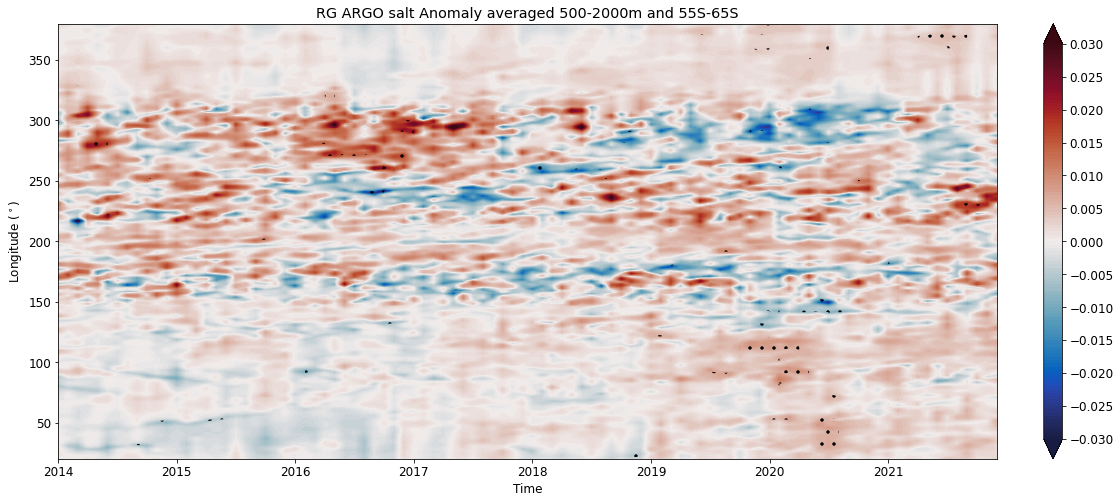

In [82]:
#plot hovmoller
fontsize=12
plt.rcParams['font.size'] = fontsize

plt.figure(figsize=(18,8))

clev = np.arange(-0.03,0.0305,.0005)
tick_lvls = np.arange(-0.030,.035, .005)

var1= rgargo_salt_0421_anom_ltmm_2000m_s55S[120:,:]
p1=plt.contourf(var1.TIME,var1.LONGITUDE,var1.data.transpose(),cmap=cm.cm.balance,levels=clev,extend='both') #
    
#monthly mean anom zavg/std
var1=rgargo_salt_0421_anom_ltmm_2000m_s55S_div_std[120:,:]
p2=plt.contourf(var1.TIME,var1.LONGITUDE,var1.where((var1>2) | (var1<-2)).data.transpose(),colors='none',hatches='.') #

plt.gca().patch.set_color('.25')
plt.ylabel('Longitude ($^\circ$)')
plt.xlabel('Time')
plt.title('RG ARGO salt Anomaly averaged 500-2000m and 55S-65S')
plt.xticks([120.5,120.5+12,120.5+24,120.5+36,120.5+48,120.5+60,120.5+72,120.5+84])
plt.gca().set_xticklabels(['2014','2015','2016','2017','2018','2019','2020','2021'])


divider = make_axes_locatable(plt.gca())
cax = divider.append_axes("right", "2%", pad="5%")
cb=plt.colorbar(p1,cax,orientation='vertical',ticks=tick_lvls)
cb.ax.set_xlabel('$^\circ$C')

plt.savefig('rgargo_salt_0421_anom_ltmm_2000m_s55S_hov.png',dpi=150,bbox_inches='tight')


In [71]:
dzt=rgargo_1921.PRESSURE.diff('PRESSURE')
#dztt=xr.concat((rgargo_temp_0421_anom_ltmm.PRESSURE[0].diff('PRESSURE'),rgargo_temp_0421_anom_ltmm.PRESSURE.diff('PRESSURE')),dim='PRESSURE')
#dzt.sel(PRESSURE=slice(0,100)).sum()
dzt

<xarray.DataArray 'PRESSURE' (PRESSURE: 57)>
array([  7.5,  10. ,  10. ,  10. ,  10. ,  10. ,  10. ,  10. ,  10. ,
        10. ,  10. ,  10. ,  10. ,  10. ,  10. ,  10. ,  10. ,  12.5,
        17.5,  20. ,  20. ,  20. ,  20. ,  20. ,  20. ,  20. ,  20. ,
        20. ,  20. ,  20. ,  20. ,  22.5,  37.5,  50. ,  50. ,  50. ,
        50. ,  50. ,  50. ,  50. ,  50. ,  50. ,  50. ,  50. ,  50. ,
        50. ,  50. ,  50. ,  50. ,  50. ,  62.5,  87.5, 100. , 100. ,
       100. , 100. ,  75. ], dtype=float32)
Coordinates:
  * PRESSURE  (PRESSURE) float32 10.0 20.0 30.0 ... 1.8e+03 1.9e+03 1.975e+03

In [72]:
#depth average upper 200m
rgargo_salt_0421_anom_ltmm_200m=(rgargo_salt_0421_anom_ltmm*dzt).sel(PRESSURE=slice(0,200)).sum('PRESSURE') / dzt.sel(PRESSURE=slice(0,200)).sum()
rgargo_salt_0421_anom_ltmm_200m=rgargo_salt_0421_anom_ltmm_200m.where(rgargo_salt_0421_anom_ltmm_200m!=0,np.NaN)
rgargo_salt_0421_anom_ltmm_200m

<xarray.DataArray (TIME: 216, LATITUDE: 145, LONGITUDE: 360)>
array([[[ 0.01200591,  0.01181112,  0.0117906 , ...,  0.01952744,
          0.01579458,  0.01312628],
        [ 0.01412756,  0.01487404,  0.0144817 , ...,  0.01585383,
          0.01356685,  0.01317693],
        [ 0.01721056,  0.01676265,  0.01524942, ...,  0.01485699,
          0.01508438,  0.01619445],
        ...,
        [        nan,         nan,         nan, ...,         nan,
                 nan,         nan],
        [        nan,         nan,         nan, ...,         nan,
                 nan,         nan],
        [        nan,         nan,         nan, ...,         nan,
                 nan,         nan]],

       [[ 0.01380993,  0.01438841,  0.01499075, ...,  0.0138883 ,
          0.0138925 ,  0.01355951],
        [ 0.01223794,  0.0131016 ,  0.01397338, ...,  0.01362523,
          0.01278643,  0.01192812],
        [ 0.01603047,  0.01682731,  0.01724827, ...,  0.01614428,
          0.01559516,  0.0153923 ],
...
        [        nan,         nan,         nan, ...,         nan,
                 nan,         nan],
        [        nan,         nan,         nan, ...,         nan,
                 nan,         nan],
        [        nan,         nan,         nan, ...,         nan,
                 nan,         nan]],

       [[ 0.00374145,  0.00267618,  0.00275498, ...,  0.0100862 ,
          0.00728554,  0.0053076 ],
        [-0.01413041, -0.01686255, -0.01363711, ...,  0.00086869,
         -0.00259694, -0.00830735],
        [-0.02404829, -0.02863321, -0.0241789 , ...,  0.00094691,
         -0.00473742, -0.014121  ],
        ...,
        [        nan,         nan,         nan, ...,         nan,
                 nan,         nan],
        [        nan,         nan,         nan, ...,         nan,
                 nan,         nan],
        [        nan,         nan,         nan, ...,         nan,
                 nan,         nan]]], dtype=float32)
Coordinates:
  * LONGITUDE  (LONGITUDE) float32 20.5 21.5 22.5 23.5 ... 377.5 378.5 379.5
  * LATITUDE   (LATITUDE) float32 -64.5 -63.5 -62.5 -61.5 ... 77.5 78.5 79.5
  * TIME       (TIME) float64 0.5 1.5 2.5 3.5 4.5 ... 212.5 213.5 214.5 215.5

In [73]:
import scipy as sp
import scipy.interpolate
import scipy.ndimage
import scipy.io
import scipy.stats


In [74]:
#calculate linear trend stats
x=rgargo_salt_0421_anom_ltmm_200m.TIME
y=rgargo_salt_0421_anom_ltmm_200m
print(y.shape,x.shape)
c= sp.stats.linregress(x,y[:,50,100])
print(c)
#corstr="shifted 1992-2016, 0 lag, R$^2$=%.2f, R=%.2f, P=%.2f" %(c.rvalue*c.rvalue,c.rvalue,c.pvalue)
#ax1.text(2004,-0.15,corstr,color='c')


(216, 145, 360) (216,)
LinregressResult(slope=-1.532214149744542e-05, intercept=0.0016547469921600892, rvalue=-0.01516436576466063, pvalue=0.8246336206740942, stderr=6.906187903140181e-05, intercept_stderr=0.008612522126473975)


In [75]:
y.shape[2]

360

In [77]:
x=rgargo_salt_0421_anom_ltmm_200m.TIME
y=rgargo_salt_0421_anom_ltmm_200m

salt_200_linstats_pvalues=np.zeros(shape = (y.shape[1],y.shape[2]))
salt_200_linstats_slope=np.zeros(shape = (y.shape[1],y.shape[2]))
print(salt_200_linstats_pvalues.shape)

for ii in range(0,y.shape[1]):
    #print(ii)
    for jj in range(0,y.shape[2]):
        salt_200_linstats_pvalues[ii,jj]=sp.stats.linregress(x,y[:,ii,jj]).pvalue
        salt_200_linstats_slope[ii,jj]=sp.stats.linregress(x,y[:,ii,jj]).slope

(145, 360)


In [78]:
salt_200_linstats_slope

array([[4.04129333e-05, 3.76763078e-05, 3.68198937e-05, ...,
        5.08831658e-05, 4.81130576e-05, 4.44636070e-05],
       [3.85230112e-05, 3.37330126e-05, 3.44296170e-05, ...,
        5.40104442e-05, 5.20916669e-05, 4.59740649e-05],
       [2.06688130e-05, 1.67262767e-05, 1.91903582e-05, ...,
        4.13134281e-05, 3.66882245e-05, 2.89178021e-05],
       ...,
       [           nan,            nan,            nan, ...,
                   nan,            nan,            nan],
       [           nan,            nan,            nan, ...,
                   nan,            nan,            nan],
       [           nan,            nan,            nan, ...,
                   nan,            nan,            nan]])

(145, 360)


Text(0, 0.5, 'g/kg/month')

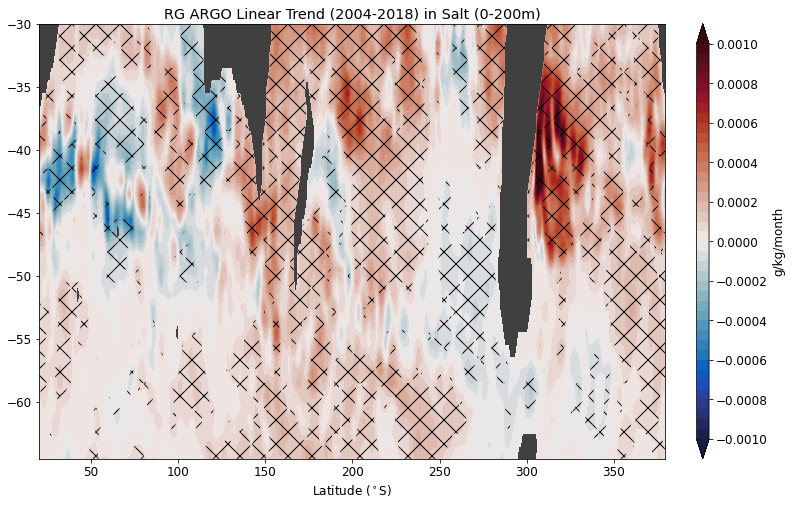

In [84]:
#do a spatial plot
fontsize=12
plt.rcParams['font.size'] = fontsize

plt.figure(figsize=(12,8))

#BUG HERE ... need to thickness weight dzt
var1= salt_200_linstats_slope
print(var1.shape)
var2= salt_200_linstats_pvalues
lon=rgargo_salt_0421_anom_ltmm_200m.LONGITUDE
lat=rgargo_salt_0421_anom_ltmm_200m.LATITUDE


clev = np.arange(-0.001,0.00105,.00005)
tick_lvls = np.arange(-0.0010,.0012,.0002)

var3=np.where(salt_200_linstats_pvalues<0.05,salt_200_linstats_pvalues,np.nan)

plt.subplot(1,1,1)
plt.gca().patch.set_color('.25')
p1=plt.contourf(lon,lat,var1,cmap=cm.cm.balance,levels=clev,extend='both') #
p3=plt.contourf(lon,lat,var3,colors='none',hatches='x') #

#plt.ylabel('Pressure (dbar)')
plt.xlabel('Latitude ($^\circ$S)')
#plt.ylim((5500,1000))
plt.ylim([-64.5,-30])
#plt.xticks([-65,-55])
plt.title('RG ARGO Linear Trend (2004-2018) in Salt (0-200m)')

divider = make_axes_locatable(plt.gca())
cax = divider.append_axes("right", "2%", pad="5%")
cb=plt.colorbar(p1,cax,orientation='vertical',ticks=tick_lvls)#,ticks=tick_lvls)
cb.ax.set_ylabel('g/kg/month')


In [86]:
#depth average upper 200m
rgargo_salt_0421_anom_ltmm_1000m=(rgargo_salt_0421_anom_ltmm*dzt).sel(PRESSURE=slice(200,1000)).sum('PRESSURE') / dzt.sel(PRESSURE=slice(200,1000)).sum()
rgargo_salt_0421_anom_ltmm_1000m=rgargo_salt_0421_anom_ltmm_1000m.where(rgargo_salt_0421_anom_ltmm_1000m!=0,np.NaN)
rgargo_salt_0421_anom_ltmm_1000m

<xarray.DataArray (TIME: 216, LATITUDE: 145, LONGITUDE: 360)>
array([[[ 2.9402566e-03,  2.9499626e-03,  2.9111740e-03, ...,
          3.5828757e-03,  3.0938128e-03,  2.9207983e-03],
        [ 3.8667498e-03,  3.8662949e-03,  3.6190744e-03, ...,
          4.1128504e-03,  3.8937093e-03,  3.8649649e-03],
        [ 4.8316931e-03,  4.6571735e-03,  4.4603492e-03, ...,
          4.8583145e-03,  4.8544179e-03,  4.8212758e-03],
        ...,
        [           nan,            nan,            nan, ...,
                    nan,            nan,            nan],
        [           nan,            nan,            nan, ...,
                    nan,            nan,            nan],
        [           nan,            nan,            nan, ...,
                    nan,            nan,            nan]],

       [[-3.4059296e-04, -3.9525863e-04, -4.8579645e-04, ...,
          2.2468217e-05, -2.2845020e-04, -2.2491548e-04],
        [-5.0026196e-04, -5.6011888e-04, -5.3749903e-04, ...,
         -2.1252647e-04, -2.3044505e-04, -4.5065922e-04],
        [-3.9269216e-04, -4.1843846e-04, -5.1371258e-04, ...,
         -1.2294525e-04, -3.3556504e-04, -3.5060217e-04],
...
        [           nan,            nan,            nan, ...,
                    nan,            nan,            nan],
        [           nan,            nan,            nan, ...,
                    nan,            nan,            nan],
        [           nan,            nan,            nan, ...,
                    nan,            nan,            nan]],

       [[ 5.2300668e-03,  5.4327007e-03,  5.6833974e-03, ...,
          5.2001323e-03,  5.2930848e-03,  5.3498386e-03],
        [ 2.9288125e-03,  2.7021240e-03,  3.1201541e-03, ...,
          5.0484892e-03,  4.5769601e-03,  3.6817195e-03],
        [ 9.9535601e-04,  3.3541338e-04,  1.0433022e-03, ...,
          4.7228052e-03,  3.7887294e-03,  2.3552198e-03],
        ...,
        [           nan,            nan,            nan, ...,
                    nan,            nan,            nan],
        [           nan,            nan,            nan, ...,
                    nan,            nan,            nan],
        [           nan,            nan,            nan, ...,
                    nan,            nan,            nan]]], dtype=float32)
Coordinates:
  * LONGITUDE  (LONGITUDE) float32 20.5 21.5 22.5 23.5 ... 377.5 378.5 379.5
  * LATITUDE   (LATITUDE) float32 -64.5 -63.5 -62.5 -61.5 ... 77.5 78.5 79.5
  * TIME       (TIME) float64 0.5 1.5 2.5 3.5 4.5 ... 212.5 213.5 214.5 215.5

In [89]:
x=rgargo_salt_0421_anom_ltmm_1000m.TIME
y=rgargo_salt_0421_anom_ltmm_1000m

salt_1000_linstats_pvalues=np.zeros(shape = (y.shape[1],y.shape[2]))
salt_1000_linstats_slope=np.zeros(shape = (y.shape[1],y.shape[2]))
print(salt_1000_linstats_pvalues.shape)

for ii in range(0,y.shape[1]):
    #print(ii)
    for jj in range(0,y.shape[2]):
        salt_1000_linstats_pvalues[ii,jj]=sp.stats.linregress(x,y[:,ii,jj]).pvalue
        salt_1000_linstats_slope[ii,jj]=sp.stats.linregress(x,y[:,ii,jj]).slope

(145, 360)


(145, 360)


Text(0, 0.5, 'g/kg/month')

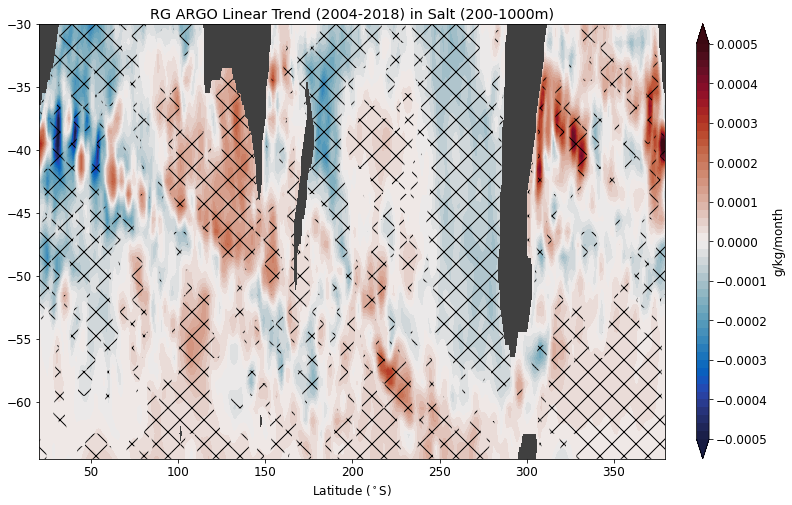

In [92]:
#do a spatial plot
fontsize=12
plt.rcParams['font.size'] = fontsize

plt.figure(figsize=(12,8))

#BUG HERE ... need to thickness weight dzt
var1= salt_1000_linstats_slope
print(var1.shape)
var2= salt_200_linstats_pvalues
lon=rgargo_salt_0421_anom_ltmm_1000m.LONGITUDE
lat=rgargo_salt_0421_anom_ltmm_1000m.LATITUDE


clev = np.arange(-0.0005,0.00052,.00002)
tick_lvls = np.arange(-0.0005,.0006,.0001)

var3=np.where(salt_1000_linstats_pvalues<0.05,salt_1000_linstats_pvalues,np.nan)

plt.subplot(1,1,1)
plt.gca().patch.set_color('.25')
p1=plt.contourf(lon,lat,var1,cmap=cm.cm.balance,levels=clev,extend='both') #
p3=plt.contourf(lon,lat,var3,colors='none',hatches='x') #

#plt.ylabel('Pressure (dbar)')
plt.xlabel('Latitude ($^\circ$S)')
#plt.ylim((5500,1000))
plt.ylim([-64.5,-30])
#plt.xticks([-65,-55])
plt.title('RG ARGO Linear Trend (2004-2018) in Salt (200-1000m)')

divider = make_axes_locatable(plt.gca())
cax = divider.append_axes("right", "2%", pad="5%")
cb=plt.colorbar(p1,cax,orientation='vertical',ticks=tick_lvls)#,ticks=tick_lvls)
cb.ax.set_ylabel('g/kg/month')


(58, 145)
(58, 145)
(58, 145)
(58, 145)
(58, 145)
(58, 145)
(58, 145)


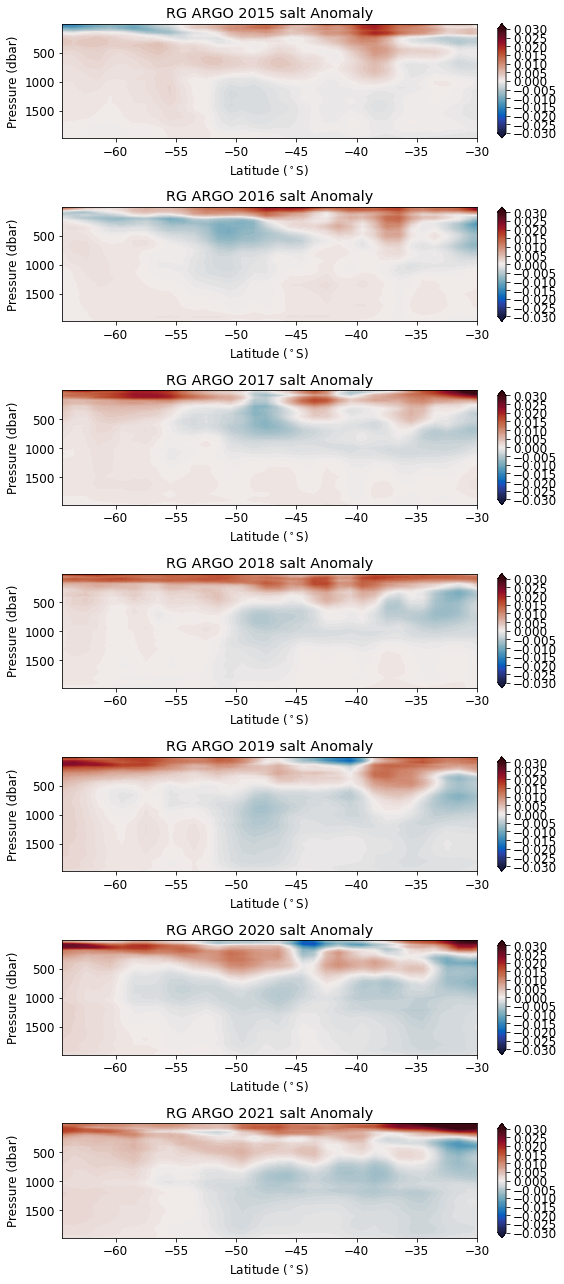

In [69]:
#plot zonal average for 2019/2020/2021
fontsize=12
plt.rcParams['font.size'] = fontsize

plt.figure(figsize=(8,18))

clev = np.arange(-0.03,0.0305,.0005)
tick_lvls = np.arange(-0.030,.035,.005)

var1= rgargo_0418.ARGO_SALINITY_ANOMALY[132:144,:,:,:].mean(dim='LONGITUDE').mean(dim='TIME').compute()
print(var1.shape)

plt.subplot(7,1,1)
plt.gca().patch.set_color('.25')
p1=plt.contourf(var1.LATITUDE,var1.PRESSURE,var1,cmap=cm.cm.balance,levels=clev,extend='both') #
plt.gca().invert_yaxis()
plt.ylabel('Pressure (dbar)')
plt.xlabel('Latitude ($^\circ$S)')
#plt.ylim((5500,1000))
plt.xlim([-64.5,-30])
#plt.xticks([-65,-55])
plt.title('RG ARGO 2015 salt Anomaly')

divider = make_axes_locatable(plt.gca())
cax = divider.append_axes("right", "2%", pad="5%")
cb=plt.colorbar(p1,cax,orientation='vertical',ticks=tick_lvls)
cb.ax.set_xlabel('$^\circ$C')

var1= rgargo_0418.ARGO_SALINITY_ANOMALY[144:156,:,:,:].mean(dim='LONGITUDE').mean(dim='TIME').compute()
print(var1.shape)

plt.subplot(7,1,2)
plt.gca().patch.set_color('.25')
p1=plt.contourf(var1.LATITUDE,var1.PRESSURE,var1,cmap=cm.cm.balance,levels=clev,extend='both') #
plt.gca().invert_yaxis()
plt.ylabel('Pressure (dbar)')
plt.xlabel('Latitude ($^\circ$S)')
#plt.ylim((5500,1000))
plt.xlim([-64.5,-30])
#plt.xticks([-65,-55])
plt.title('RG ARGO 2016 salt Anomaly')

divider = make_axes_locatable(plt.gca())
cax = divider.append_axes("right", "2%", pad="5%")
cb=plt.colorbar(p1,cax,orientation='vertical',ticks=tick_lvls)
cb.ax.set_xlabel('$^\circ$C')

var1= rgargo_0418.ARGO_SALINITY_ANOMALY[156:168,:,:,:].mean(dim='LONGITUDE').mean(dim='TIME').compute()
print(var1.shape)

plt.subplot(7,1,3)
plt.gca().patch.set_color('.25')
p1=plt.contourf(var1.LATITUDE,var1.PRESSURE,var1,cmap=cm.cm.balance,levels=clev,extend='both') #
plt.gca().invert_yaxis()
plt.ylabel('Pressure (dbar)')
plt.xlabel('Latitude ($^\circ$S)')
#plt.ylim((5500,1000))
plt.xlim([-64.5,-30])
#plt.xticks([-65,-55])
plt.title('RG ARGO 2017 salt Anomaly')

divider = make_axes_locatable(plt.gca())
cax = divider.append_axes("right", "2%", pad="5%")
cb=plt.colorbar(p1,cax,orientation='vertical',ticks=tick_lvls)
cb.ax.set_xlabel('$^\circ$C')

var1= rgargo_0418.ARGO_SALINITY_ANOMALY[168:180,:,:,:].mean(dim='LONGITUDE').mean(dim='TIME').compute()
print(var1.shape)

plt.subplot(7,1,4)
plt.gca().patch.set_color('.25')
p1=plt.contourf(var1.LATITUDE,var1.PRESSURE,var1,cmap=cm.cm.balance,levels=clev,extend='both') #
plt.gca().invert_yaxis()
plt.ylabel('Pressure (dbar)')
plt.xlabel('Latitude ($^\circ$S)')
#plt.ylim((5500,1000))
plt.xlim([-64.5,-30])
#plt.xticks([-65,-55])
plt.title('RG ARGO 2018 salt Anomaly')

divider = make_axes_locatable(plt.gca())
cax = divider.append_axes("right", "2%", pad="5%")
cb=plt.colorbar(p1,cax,orientation='vertical',ticks=tick_lvls)
cb.ax.set_xlabel('$^\circ$C')


var1= rgargo_1921.ARGO_SALINITY_ANOMALY[0:12,:,:,:].mean(dim='LONGITUDE').mean(dim='TIME').compute()
print(var1.shape)

plt.subplot(7,1,5)
plt.gca().patch.set_color('.25')
p1=plt.contourf(var1.LATITUDE,var1.PRESSURE,var1,cmap=cm.cm.balance,levels=clev,extend='both') #
plt.gca().invert_yaxis()
plt.ylabel('Pressure (dbar)')
plt.xlabel('Latitude ($^\circ$S)')
#plt.ylim((5500,1000))
plt.xlim([-64.5,-30])
#plt.xticks([-65,-55])
plt.title('RG ARGO 2019 salt Anomaly')

divider = make_axes_locatable(plt.gca())
cax = divider.append_axes("right", "2%", pad="5%")
cb=plt.colorbar(p1,cax,orientation='vertical',ticks=tick_lvls)
cb.ax.set_xlabel('$^\circ$C')


var1= rgargo_1921.ARGO_SALINITY_ANOMALY[12:24,:,:,:].mean(dim='LONGITUDE').mean(dim='TIME').compute()
print(var1.shape)

plt.subplot(7,1,6)
plt.gca().patch.set_color('.25')
p1=plt.contourf(var1.LATITUDE,var1.PRESSURE,var1,cmap=cm.cm.balance,levels=clev,extend='both') #
plt.gca().invert_yaxis()
plt.ylabel('Pressure (dbar)')
plt.xlabel('Latitude ($^\circ$S)')
#plt.ylim((5500,1000))
plt.xlim([-64.5,-30])
#plt.xticks([-65,-55])
plt.title('RG ARGO 2020 salt Anomaly')

divider = make_axes_locatable(plt.gca())
cax = divider.append_axes("right", "2%", pad="5%")
cb=plt.colorbar(p1,cax,orientation='vertical',ticks=tick_lvls)
cb.ax.set_xlabel('$^\circ$C')

var1= rgargo_1921.ARGO_SALINITY_ANOMALY[24:36,:,:,:].mean(dim='LONGITUDE').mean(dim='TIME').compute()
print(var1.shape)

plt.subplot(7,1,7)
plt.gca().patch.set_color('.25')
p1=plt.contourf(var1.LATITUDE,var1.PRESSURE,var1,cmap=cm.cm.balance,levels=clev,extend='both') #
plt.gca().invert_yaxis()
plt.ylabel('Pressure (dbar)')
plt.xlabel('Latitude ($^\circ$S)')
#plt.ylim((5500,1000))
plt.xlim([-64.5,-30])
#plt.xticks([-65,-55])
plt.title('RG ARGO 2021 salt Anomaly')

divider = make_axes_locatable(plt.gca())
cax = divider.append_axes("right", "2%", pad="5%")
cb=plt.colorbar(p1,cax,orientation='vertical',ticks=tick_lvls)
cb.ax.set_xlabel('$^\circ$C')

plt.tight_layout()

plt.savefig('RGARGO_salt_Ann.png',dpi=220,bbox_inches = 'tight')

In [70]:
var1=rgargo_salt_anom_0421.mean(dim='LONGITUDE')[120].load()
var1

<xarray.DataArray 'ARGO_SALINITY_ANOMALY' (PRESSURE: 58, LATITUDE: 145)>
array([[-2.7389714e-01, -2.4748717e-01, -1.8756388e-01, ...,
         5.7947371e-02,  7.5000003e-02,  8.2066670e-02],
       [-2.5645426e-01, -2.3511395e-01, -1.7946945e-01, ...,
         3.2052629e-02,  4.7133330e-02,  5.2466668e-02],
       [-2.1873143e-01, -2.0848434e-01, -1.6180277e-01, ...,
         4.6842098e-03,  1.7266667e-02,  1.8666666e-02],
       ...,
       [-5.1428589e-05,  8.5469865e-06,  1.8333329e-04, ...,
                   nan,            nan,            nan],
       [-2.7428570e-04, -2.6495729e-04, -1.1111113e-04, ...,
                   nan,            nan,            nan],
       [-8.2000002e-04, -9.0028497e-04, -8.6666667e-04, ...,
                   nan,            nan,            nan]], dtype=float32)
Coordinates:
  * LATITUDE  (LATITUDE) float32 -64.5 -63.5 -62.5 -61.5 ... 76.5 77.5 78.5 79.5
  * PRESSURE  (PRESSURE) float32 2.5 10.0 20.0 ... 1.8e+03 1.9e+03 1.975e+03
    TIME      float64 120.5